In [283]:
import pandas as pd

In [284]:
df_noway_kr = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayKR.parquet")
df_noway_euw = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayEUW.parquet")
df = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\test_data.parquet")

In [285]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [286]:
df_noway_kr.shape

(301, 46)

In [287]:
df_noway_kr.dtypes

gameCreation        datetime64[ns]
gameEndTimestamp    datetime64[ns]
gameDuration                 int64
gameVersion                 object
laneOpponent                object
                         ...      
redBanTop                   object
redBanJungle                object
redBanMiddle                object
redBanBottom                object
redBanSupport               object
Length: 46, dtype: object

In [288]:
df_noway_kr

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,laneOpponent,gameDuration_m_s,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,bluePickTop,bluePickJungle,bluePickMiddle,bluePickBottom,bluePickSupport,redPickTop,redPickJungle,redPickMiddle,redPickBottom,redPickSupport,blueBanTop,blueBanJungle,blueBanMiddle,blueBanBottom,blueBanSupport,redBanTop,redBanJungle,redBanMiddle,redBanBottom,redBanSupport
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KR_6802420097,2023-11-17 21:29:47,2023-11-17 21:46:12,971,13.22,Talon,16:11,2,8,1,Jayce,False,False,True,False,False,True,5505,2099,9141,False,MIDDLE,11241,1,7,False,200,Aatrox,Gragas,Talon,Jinx,Blitzcrank,Poppy,Nidalee,Jayce,Kaisa,Rakan,Graves,Leona,NoBan,Orianna,KSante,LeeSin,Kalista,Akali,Yone,Samira
KR_6802412088,2023-11-17 20:53:10,2023-11-17 21:16:40,1391,13.22,Jayce,23:11,8,5,5,Syndra,False,False,False,True,False,True,12389,18214,1533,False,MIDDLE,21143,2,11,True,100,Quinn,Briar,Syndra,Ezreal,Bard,Malphite,Varus,Jayce,Sylas,Ashe,Nautilus,Blitzcrank,Nidalee,KSante,Akali,Kennen,Graves,KSante,Yasuo,Yone
KR_6802398237,2023-11-17 20:15:46,2023-11-17 20:37:52,1310,13.22,Jayce,21:50,2,2,4,Orianna,False,False,False,False,False,False,8406,10133,632,False,MIDDLE,10766,2,9,True,100,Varus,MonkeyKing,Orianna,Caitlyn,Morgana,Singed,Nidalee,Jayce,Jhin,Nautilus,Akali,Ziggs,Yone,Kalista,Sylas,Ashe,Draven,Gangplank,Evelynn,Nilah
KR_6802385080,2023-11-17 19:38:45,2023-11-17 20:08:03,1741,13.22,Gragas,29:01,1,4,21,Alistar,True,False,False,False,False,False,7926,6097,1066,False,SUPPORT,8364,4,29,True,200,Riven,LeeSin,Katarina,Kalista,Gragas,Sett,Karthus,Irelia,Jinx,Alistar,JarvanIV,Renekton,Yasuo,Ziggs,Yone,Rakan,Akali,NoBan,KSante,Talon
KR_6802359571,2023-11-17 19:02:33,2023-11-17 19:24:30,1279,13.22,Neeko,21:19,5,5,2,Xerath,False,True,False,False,False,True,8471,9777,719,False,MIDDLE,10497,3,7,True,100,KSante,Khazix,Xerath,Jinx,Thresh,Ahri,LeeSin,Neeko,Varus,Zilean,NoBan,Akali,Kalista,Ziggs,Taliyah,Yone,Rakan,Kaisa,Orianna,Graves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KR_6763642564,2023-10-22 17:16:15,2023-10-22 17:48:17,1904,13.20,Vladimir,31:44,7,11,8,Jayce,False,False,False,False,False,False,11402,5049,28901,False,MIDDLE,33950,2,12,False,100,Heimerdinger,Karthus,Jayce,Kaisa,Rakan,Sion,Nocturne,Vladimir,Ezreal,Karma,Poppy,LeeSin,Ziggs,Graves,Irelia,Orianna,Draven,Nidalee,Aatrox,Neeko
KR_6763615111,2023-10-22 16:38:25,2023-10-22 17:09:15,1836,13.20,Talon,30:36,3,7,6,Orianna,False,False,False,False,False,False,11797,19239,1641,False,MIDDLE,21072,2,12,False,100,Shen,Graves,Orianna,Jinx,Rakan,Jayce,Nidalee,Talon,Aphelios,Bard,Azir,NoBan,Akali,Karthus,Draven,Blitzcrank,NoBan,Yone,Taliyah,Belveth
KR_6763569909,2023-10-22 16:04:14,2023-10-22 16:30:02,1535,13.20,Renekton,25:35,8,3,11,Gragas,False,False,False,False,False,False,12655,23916,3027,False,TOP,26943,0,8,True,200,Renekton,Gwen,Yone,Zeri,Yuumi,Gragas,Shaco,Katarina,Ezreal,Karma,Jax,NoBan,Karthus,Ziggs,Akshan,Tryndamere,Leblanc,LeeSin,Kalista,Nidalee


#### Game Duration in Minutes Bar Chart with Bins

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def game_duration_in_minutes_bar_chart(df: pd.DataFrame, bin_size=4):
    minutes_df = df["gameDuration_m_s"].apply(lambda x: int(x.split(":")[0]))

    min = minutes_df.min()
    min_bin = min if min % 2 == 0 else min - 1

    max = minutes_df.max()
    max_bin = max if max % 2 == 0 else max + 1

    bin_size = 4

    bin_edges = [x for x in range(min_bin, max_bin, bin_size)]

    hist, edges = np.histogram(minutes_df, bins=bin_edges)

    plt.bar(edges[:-1], hist, width=edges[1]-edges[0] - 0.1, color='blue', align='edge')

    plt.xlabel(f'Bins of size: {bin_size}')
    plt.ylabel('Frequency')
    plt.title(f'Game duration in minutes')

    plt.show()

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def game_duration_in_minutes_bar_chart(dataframes, names, bin_size=4):
    fig, axs = plt.subplots(1, len(dataframes), figsize=(12, 5))  # Adjust the figsize as needed

    for i, df in enumerate(dataframes):
        minutes_df = df["gameDuration_m_s"].apply(lambda x: int(x.split(":")[0]))

        min_val = minutes_df.min()
        min_bin = min_val if min_val % 2 == 0 else min_val - 1

        max_val = minutes_df.max()
        max_bin = max_val if max_val % 2 == 0 else max_val + 1

        bin_edges = [x for x in range(0, 60, bin_size)]

        hist, edges = np.histogram(minutes_df, bins=bin_edges)

        axs[i].bar(edges[:-1], hist, width=edges[1]-edges[0] - 0.2, color='blue', align='edge')

        axs[i].set_xlabel(f'Bins of size: {bin_size}')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Game duration in minutes - Dataset: Noway {names[i]}')

        axs[i].set_ylim(0, 100)

    plt.tight_layout()
    plt.show()

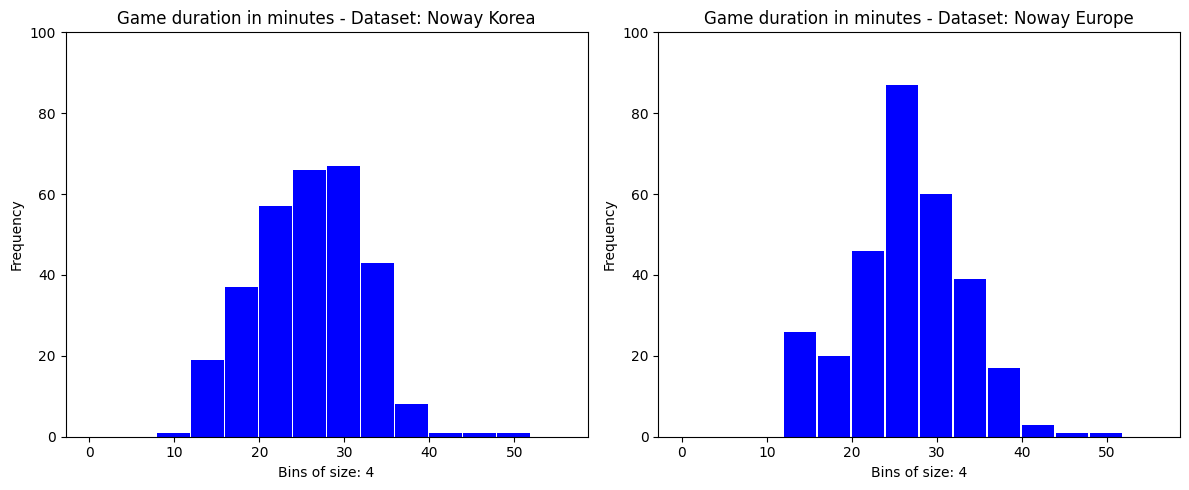

In [291]:
game_duration_in_minutes_bar_chart([df_noway_kr, df_noway_euw], ["Korea", "Europe"])

#### 5 Most played Champions -> Matchups (count, winrate)

In [292]:
most_played_champion = df_noway_kr["championName"].value_counts().head(1).index[0]

filt_games = df_noway_kr["championName"] == most_played_champion
filt_wins = (df_noway_kr["championName"] == most_played_champion) & (df_noway_kr["win"] == True)

match_up_counts_series = pd.Series(df_noway_kr.loc[filt_games, "laneOpponent"].value_counts().head(10), name="Games")
match_up_wins_series = pd.Series(df_noway_kr.loc[filt_wins, "laneOpponent"].value_counts().head(10), name="Wins")
merged_series = pd.concat([match_up_counts_series, match_up_wins_series], axis="columns")
merged_series.fillna(0, inplace=True)
merged_series["Winrate"] = merged_series["Wins"] / merged_series["Games"] * 100

In [293]:
# df_noway_kr.set_index("matchId", inplace=True)
df_noway_kr['gameCreation'].max() - df_noway_kr['gameCreation'].min()


df_noway_kr.set_index('gameCreation', inplace=True)
df_noway_kr

,gameEndTimestamp,gameDuration,gameVersion,laneOpponent,gameDuration_m_s,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,bluePickTop,bluePickJungle,bluePickMiddle,bluePickBottom,bluePickSupport,redPickTop,redPickJungle,redPickMiddle,redPickBottom,redPickSupport,blueBanTop,blueBanJungle,blueBanMiddle,blueBanBottom,blueBanSupport,redBanTop,redBanJungle,redBanMiddle,redBanBottom,redBanSupport
gameCreation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-11-17 21:29:47,2023-11-17 21:46:12,971,13.22,Talon,16:11,2,8,1,Jayce,False,False,True,False,False,True,5505,2099,9141,False,MIDDLE,11241,1,7,False,200,Aatrox,Gragas,Talon,Jinx,Blitzcrank,Poppy,Nidalee,Jayce,Kaisa,Rakan,Graves,Leona,NoBan,Orianna,KSante,LeeSin,Kalista,Akali,Yone,Samira
2023-11-17 20:53:10,2023-11-17 21:16:40,1391,13.22,Jayce,23:11,8,5,5,Syndra,False,False,False,True,False,True,12389,18214,1533,False,MIDDLE,21143,2,11,True,100,Quinn,Briar,Syndra,Ezreal,Bard,Malphite,Varus,Jayce,Sylas,Ashe,Nautilus,Blitzcrank,Nidalee,KSante,Akali,Kennen,Graves,KSante,Yasuo,Yone
2023-11-17 20:15:46,2023-11-17 20:37:52,1310,13.22,Jayce,21:50,2,2,4,Orianna,False,False,False,False,False,False,8406,10133,632,False,MIDDLE,10766,2,9,True,100,Varus,MonkeyKing,Orianna,Caitlyn,Morgana,Singed,Nidalee,Jayce,Jhin,Nautilus,Akali,Ziggs,Yone,Kalista,Sylas,Ashe,Draven,Gangplank,Evelynn,Nilah
2023-11-17 19:38:45,2023-11-17 20:08:03,1741,13.22,Gragas,29:01,1,4,21,Alistar,True,False,False,False,False,False,7926,6097,1066,False,SUPPORT,8364,4,29,True,200,Riven,LeeSin,Katarina,Kalista,Gragas,Sett,Karthus,Irelia,Jinx,Alistar,JarvanIV,Renekton,Yasuo,Ziggs,Yone,Rakan,Akali,NoBan,KSante,Talon
2023-11-17 19:02:33,2023-11-17 19:24:30,1279,13.22,Neeko,21:19,5,5,2,Xerath,False,True,False,False,False,True,8471,9777,719,False,MIDDLE,10497,3,7,True,100,KSante,Khazix,Xerath,Jinx,Thresh,Ahri,LeeSin,Neeko,Varus,Zilean,NoBan,Akali,Kalista,Ziggs,Taliyah,Yone,Rakan,Kaisa,Orianna,Graves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-22 17:16:15,2023-10-22 17:48:17,1904,13.20,Vladimir,31:44,7,11,8,Jayce,False,False,False,False,False,False,11402,5049,28901,False,MIDDLE,33950,2,12,False,100,Heimerdinger,Karthus,Jayce,Kaisa,Rakan,Sion,Nocturne,Vladimir,Ezreal,Karma,Poppy,LeeSin,Ziggs,Graves,Irelia,Orianna,Draven,Nidalee,Aatrox,Neeko
2023-10-22 16:38:25,2023-10-22 17:09:15,1836,13.20,Talon,30:36,3,7,6,Orianna,False,False,False,False,False,False,11797,19239,1641,False,MIDDLE,21072,2,12,False,100,Shen,Graves,Orianna,Jinx,Rakan,Jayce,Nidalee,Talon,Aphelios,Bard,Azir,NoBan,Akali,Karthus,Draven,Blitzcrank,NoBan,Yone,Taliyah,Belveth
2023-10-22 16:04:14,2023-10-22 16:30:02,1535,13.20,Renekton,25:35,8,3,11,Gragas,False,False,False,False,False,False,12655,23916,3027,False,TOP,26943,0,8,True,200,Renekton,Gwen,Yone,Zeri,Yuumi,Gragas,Shaco,Katarina,Ezreal,Karma,Jax,NoBan,Karthus,Ziggs,Akshan,Tryndamere,Leblanc,LeeSin,Kalista,Nidalee


<Axes: xlabel='gameCreation'>

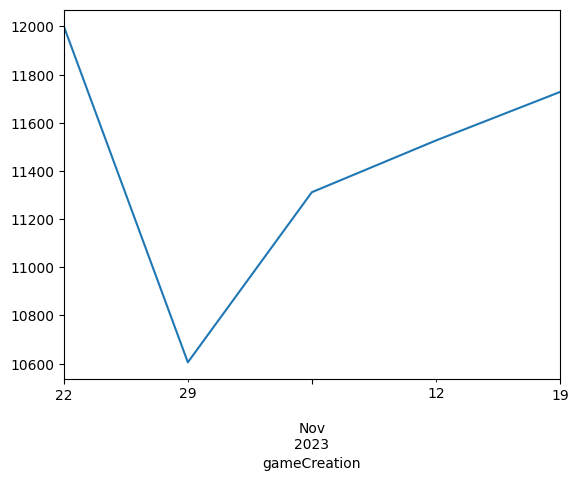

In [294]:
df_2019 = df_noway_kr["goldEarned"].resample("W").mean()
df_2019.plot()

In [295]:
df_noway_kr.head()

,gameEndTimestamp,gameDuration,gameVersion,laneOpponent,gameDuration_m_s,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,bluePickTop,bluePickJungle,bluePickMiddle,bluePickBottom,bluePickSupport,redPickTop,redPickJungle,redPickMiddle,redPickBottom,redPickSupport,blueBanTop,blueBanJungle,blueBanMiddle,blueBanBottom,blueBanSupport,redBanTop,redBanJungle,redBanMiddle,redBanBottom,redBanSupport
gameCreation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-11-17 21:29:47,2023-11-17 21:46:12,971,13.22,Talon,16:11,2,8,1,Jayce,False,False,True,False,False,True,5505,2099,9141,False,MIDDLE,11241,1,7,False,200,Aatrox,Gragas,Talon,Jinx,Blitzcrank,Poppy,Nidalee,Jayce,Kaisa,Rakan,Graves,Leona,NoBan,Orianna,KSante,LeeSin,Kalista,Akali,Yone,Samira
2023-11-17 20:53:10,2023-11-17 21:16:40,1391,13.22,Jayce,23:11,8,5,5,Syndra,False,False,False,True,False,True,12389,18214,1533,False,MIDDLE,21143,2,11,True,100,Quinn,Briar,Syndra,Ezreal,Bard,Malphite,Varus,Jayce,Sylas,Ashe,Nautilus,Blitzcrank,Nidalee,KSante,Akali,Kennen,Graves,KSante,Yasuo,Yone
2023-11-17 20:15:46,2023-11-17 20:37:52,1310,13.22,Jayce,21:50,2,2,4,Orianna,False,False,False,False,False,False,8406,10133,632,False,MIDDLE,10766,2,9,True,100,Varus,MonkeyKing,Orianna,Caitlyn,Morgana,Singed,Nidalee,Jayce,Jhin,Nautilus,Akali,Ziggs,Yone,Kalista,Sylas,Ashe,Draven,Gangplank,Evelynn,Nilah
2023-11-17 19:38:45,2023-11-17 20:08:03,1741,13.22,Gragas,29:01,1,4,21,Alistar,True,False,False,False,False,False,7926,6097,1066,False,SUPPORT,8364,4,29,True,200,Riven,LeeSin,Katarina,Kalista,Gragas,Sett,Karthus,Irelia,Jinx,Alistar,JarvanIV,Renekton,Yasuo,Ziggs,Yone,Rakan,Akali,NoBan,KSante,Talon
2023-11-17 19:02:33,2023-11-17 19:24:30,1279,13.22,Neeko,21:19,5,5,2,Xerath,False,True,False,False,False,True,8471,9777,719,False,MIDDLE,10497,3,7,True,100,KSante,Khazix,Xerath,Jinx,Thresh,Ahri,LeeSin,Neeko,Varus,Zilean,NoBan,Akali,Kalista,Ziggs,Taliyah,Yone,Rakan,Kaisa,Orianna,Graves


In [296]:
games = df_noway_kr["championName"].value_counts()
stats = df_noway_kr.groupby("championName").agg({"win": "sum", "kills": "mean", "deaths": "mean", "assists": "mean"})

op_gg = pd.concat([games, stats], axis="columns")
op_gg["winrate"] = op_gg["win"] / op_gg["count"] * 100
op_gg

,count,win,kills,deaths,assists,winrate
championName,,,,,,
Syndra,51,29,5.843137,6.333333,6.137255,56.862745
Orianna,47,23,4.446809,4.787234,6.957447,48.936170
Ziggs,32,17,6.218750,5.843750,7.437500,53.125000
Gragas,31,15,5.161290,5.838710,7.645161,48.387097
Gangplank,23,11,5.434783,5.521739,5.826087,47.826087
...,...,...,...,...,...,...
LeeSin,1,0,1.000000,6.000000,5.000000,0.000000
Velkoz,1,0,2.000000,6.000000,7.000000,0.000000
Irelia,1,0,2.000000,7.000000,4.000000,0.000000


<Axes: xlabel='teamPosition', ylabel='Percentage %'>

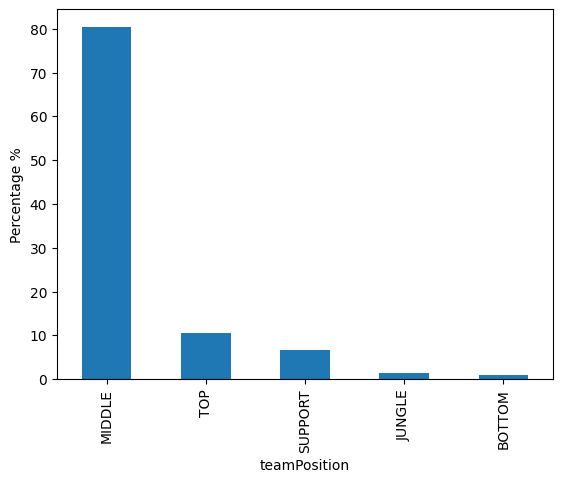

In [297]:
df_noway_kr["teamPosition"].value_counts(normalize=True).mul(100).plot(kind="bar", ylabel="Percentage %")

<Axes: xlabel='teamPosition', ylabel='Percentage %'>

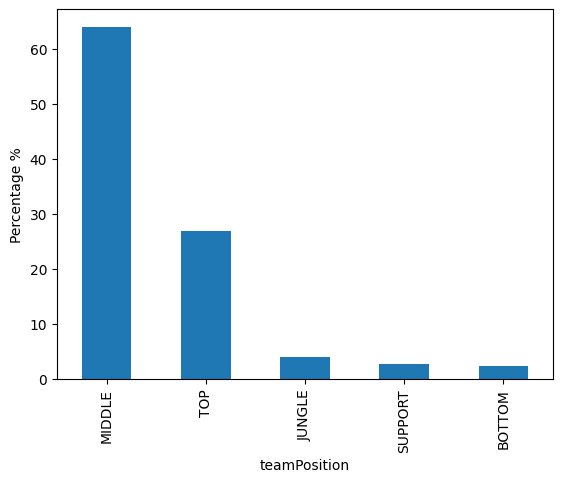

In [298]:
df_noway_euw["teamPosition"].value_counts(normalize=True).mul(100).plot(kind="bar", ylabel="Percentage %")

<Axes: xlabel='games', ylabel='winrate'>

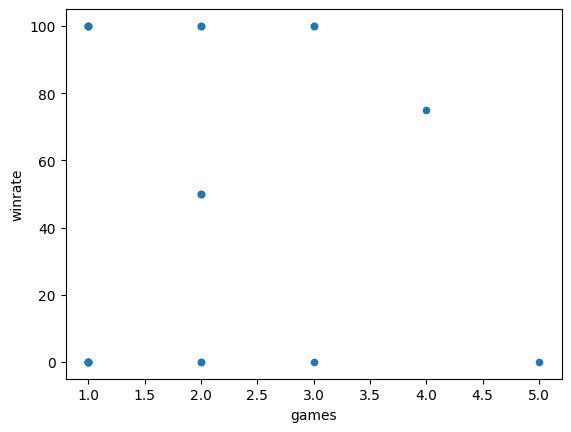

In [299]:
pd.set_option('display.max_rows', None)

df_noway_kr["games"] = 1
df_noway_kr.head()

filt = df_noway_kr["championName"] == "Orianna"

# match_ups = df_noway_kr.loc[filt,["championName", "laneOpponent"]].value_counts(normalize=True)
ori_wins = df_noway_kr.loc[filt, ["championName", "laneOpponent", "games", "win"]].groupby("laneOpponent").agg({"games": "sum", "win": "sum"}).sort_values("win", ascending=False)

ori_wins["winrate"] = ori_wins["win"] / ori_wins["games"] * 100
ori_wins.drop("win", axis="columns")
ori_wins.plot(kind="scatter", x="games", y="winrate")

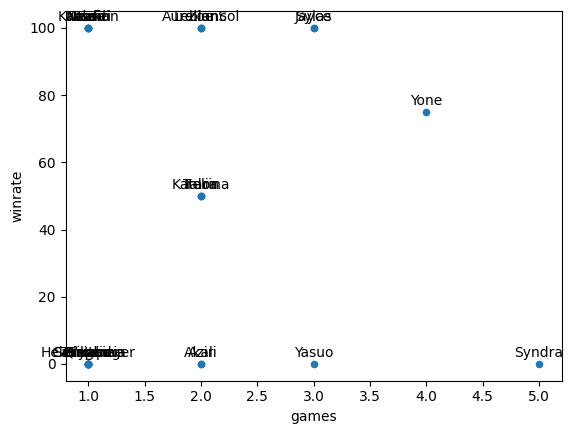

In [300]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot and label points with their index
ax = ori_wins.plot(kind="scatter", x="games", y="winrate")

# Annotate each point with its index
for label, x, y in zip(ori_wins.index, ori_wins['games'], ori_wins['winrate']):
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


In [301]:
filt = (df_noway_kr["championName"] == "Orianna") & (df_noway_kr["laneOpponent"] == "Akali")
df_noway_kr.loc[filt, ["championName", "laneOpponent", "win"]].shape[0]

2

#### Worst Lane Opponent

In [302]:
lane_opponent_wins = pd.Series(df_noway_kr.groupby("laneOpponent")["win"].sum().sort_values(ascending=False), name="Wins")
lane_opponent_wins.head()

laneOpponent
Orianna    17
Jayce      11
Yone       10
Akali       8
Sylas       6
Name: Wins, dtype: int64

In [303]:
lane_opponent_games = pd.Series(df_noway_kr.groupby("laneOpponent").size(), name="Games")
lane_opponent_games.head()

laneOpponent
Aatrox      2
Ahri        8
Akali      12
Akshan      6
Alistar     1
Name: Games, dtype: int64

In [304]:
lane_opponent = pd.concat([lane_opponent_games, lane_opponent_wins], axis="columns")
lane_opponent["Winrate"] = lane_opponent["Wins"] / lane_opponent["Games"] * 100
lane_opponent.sort_values(by="Games", ascending=False)

filt = (lane_opponent["Games"] > 10) & (lane_opponent["Winrate"] < 50)
lane_opponent.loc[filt]

,Games,Wins,Winrate
laneOpponent,,,
Sylas,17,6,35.294118
Syndra,13,5,38.461538


#### Worst overall champion in enemy team

In [305]:
blue_side = ["bluePickTop", "bluePickJungle", "bluePickMiddle", "bluePickBottom", "bluePickSupport"]
red_side = ["redPickTop", "redPickJungle", "redPickMiddle", "redPickBottom", "redPickSupport"]

* red side enemy champions

In [306]:
filt = df_noway_kr["teamId"] == 100
enemy_on_red_side = df_noway_kr.loc[filt, red_side + ["win"]]
enemy_on_red_side.head()

,redPickTop,redPickJungle,redPickMiddle,redPickBottom,redPickSupport,win
gameCreation,,,,,,
2023-11-17 20:53:10,Malphite,Varus,Jayce,Sylas,Ashe,True
2023-11-17 20:15:46,Singed,Nidalee,Jayce,Jhin,Nautilus,True
2023-11-17 19:02:33,Ahri,LeeSin,Neeko,Varus,Zilean,True
2023-11-17 17:49:57,KSante,Brand,Tryndamere,Varus,Karma,False
2023-11-17 17:13:29,Rumble,Vi,TwistedFate,Nilah,Zilean,True


In [307]:
red_side_enemy_champion_games = pd.Series(enemy_on_red_side[red_side].stack().value_counts(), name="Games")
red_side_enemy_champion_games.head()

Rakan       25
Jayce       20
Kaisa       20
Nautilus    20
LeeSin      19
Name: Games, dtype: int64

In [308]:
filt = enemy_on_red_side["win"]
enemy_wins = pd.Series(enemy_on_red_side.loc[filt][red_side].stack().value_counts(), name="Wins")

In [309]:
red_side_pick_wr = pd.concat([red_side_enemy_champion_games, enemy_wins], axis="columns")
red_side_pick_wr["Winrate"] = red_side_pick_wr["Wins"] / red_side_pick_wr["Games"] * 100
# red_side_pick_wr.sort_values("Winrate", ascending=False)

filt = (red_side_pick_wr["Games"] > 10) & (red_side_pick_wr["Winrate"] < 40)
red_side_pick_wr.loc[filt]

,Games,Wins,Winrate
Jax,14,2.0,14.285714


* blue side enemy champions

In [310]:
filt = df_noway_kr["teamId"] == 200
enemy_on_blue_side = df_noway_kr.loc[filt, blue_side + ["win"]]
enemy_on_blue_side.head()

,bluePickTop,bluePickJungle,bluePickMiddle,bluePickBottom,bluePickSupport,win
gameCreation,,,,,,
2023-11-17 21:29:47,Aatrox,Gragas,Talon,Jinx,Blitzcrank,False
2023-11-17 19:38:45,Riven,LeeSin,Katarina,Kalista,Gragas,True
2023-11-17 18:27:08,Vladimir,JarvanIV,Akshan,Xayah,Blitzcrank,False
2023-11-17 15:21:30,Rumble,JarvanIV,Syndra,Draven,Rell,False
2023-11-16 20:14:44,Aatrox,Graves,Neeko,Sivir,Alistar,True


In [311]:
filt = enemy_on_blue_side["win"] == False
loses = enemy_on_blue_side.loc[filt].stack().value_counts()["Jax"]

filt = enemy_on_blue_side["win"] == True
wins = enemy_on_blue_side.loc[filt].stack().value_counts()["Jax"]

loses, wins

(5, 5)

In [312]:
filt = enemy_on_red_side["win"] == False
loses = enemy_on_red_side.loc[filt].stack().value_counts()["Jax"]

filt = enemy_on_red_side["win"] == True
wins = enemy_on_red_side.loc[filt].stack().value_counts()["Jax"]

loses, wins

(12, 2)

In [313]:
blue_side = ["bluePickTop", "bluePickJungle", "bluePickMiddle", "bluePickBottom", "bluePickSupport"]
red_side = ["redPickTop", "redPickJungle", "redPickMiddle", "redPickBottom", "redPickSupport"]

filt = df_noway_kr["teamId"] == 100
enemy_on_red_side = df_noway_kr.loc[filt, red_side + ["win"]]
filt = enemy_on_red_side["win"] == False
for _, value in enemy_on_red_side.loc[filt][red_side].iterrows():
    print(value.values)
    break

['KSante' 'Brand' 'Tryndamere' 'Varus' 'Karma']


In [314]:
# df_noway_kr["onBlueSide"] = df_noway_kr["teamId"] == 100
# df_noway_kr[["teamId", "onBlueSide"]].head(10)

In [315]:
filt = df["win"]
df.loc[~filt, ["totalTeamKills", "totalTeamDeaths"]].mean()

totalTeamKills     10.0
totalTeamDeaths    26.5
dtype: float64

In [316]:
df[["allyTopPick", "allyJunglePick", "allyMiddlePick", "allyBottomPick", "allySupportPick"]]

,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick
matchId,,,,,
KR_6806188460,Nidalee,LeeSin,Syndra,Ezreal,Thresh
KR_6806178635,KSante,Belveth,Ahri,Caitlyn,Ashe
KR_6806169490,KSante,Karthus,Jayce,Kaisa,Alistar
KR_6806162185,Gwen,Rengar,Vex,Jayce,Alistar
KR_6806151648,KSante,LeeSin,Ahri,Jinx,Maokai
KR_6806142780,KSante,Kindred,Syndra,Samira,Taric
KR_6806128569,Kayle,Briar,Syndra,Aphelios,Janna
KR_6806109349,Garen,Rell,Senna,Heimerdinger,KSante
KR_6802420097,Poppy,Nidalee,Jayce,Kaisa,Rakan


In [319]:
df[["allyTopBan", "allyJungleBan", "allyMiddleBan", "allyBottomBan", "allySupportBan"]]
# df[["enemyTopBan", "enemyJungleBan", "enemyMiddleBan", "enemyBottomBan", "enemySupportBan"]]

,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan
matchId,,,,,
KR_6806188460,Vayne,Kalista,Akali,Blitzcrank,Draven
KR_6806178635,Senna,Jax,Ziggs,Orianna,Draven
KR_6806169490,Rumble,Rell,Pyke,Anivia,Neeko
KR_6806162185,Draven,Akali,Ashe,Kalista,NoBan
KR_6806151648,Graves,Kalista,Jax,Varus,Akali
KR_6806142780,Graves,Kalista,Ziggs,Orianna,Jax
KR_6806128569,Fiora,Graves,Nautilus,Zoe,Akali
KR_6806109349,Kalista,Nidalee,Belveth,Rakan,Jax
KR_6802420097,Graves,Leona,NoBan,Orianna,KSante
